In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
apple_training_complete = pd.read_csv('/content/drive/My Drive/Deep Learning/apple_training.csv')

In [4]:
apple_training_complete.shape

(1260, 7)

In [6]:
apple_training_complete.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,53.974899,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,55.684914,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,54.982059,88241300
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,53.450539,148583400
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,53.136124,121039100


In [0]:
apple_traing_processed = apple_training_complete.iloc[:,1:2].values

In [7]:
apple_traing_processed.shape

(1260, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [0]:
apple_training_scaled = scaler.fit_transform(apple_traing_processed)

In [10]:
apple_training_scaled.shape

(1260, 1)

In [11]:
# Data Before Scaling
apple_traing_processed

array([[ 72.932854],
       [ 79.117142],
       [ 78.26857 ],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [12]:
# Data After Scaling
apple_training_scaled

array([[0.14628787],
       [0.19795893],
       [0.19086893],
       ...,
       [0.95814041],
       [0.96566005],
       [0.96164958]])

In [0]:
# Now chossing the features & labels
features_set = []
labels = []
for i in range(60,1260):
  features_set.append(apple_training_scaled[i-60 : i , 0])
  labels.append(apple_training_scaled[i , 0])

In [16]:
print(len(features_set))
print(len(labels))

1200
1200


In [0]:
features_set , labels = np.array(features_set) , np.array(labels)

In [17]:
features_set.shape

(1200, 60)

In [18]:
labels.shape

(1200,)

In [0]:
features_set = np.reshape(features_set, (features_set.shape[0] , features_set.shape[1] , 1))

In [21]:
features_set.shape

(1200, 60, 1)

In [0]:
# Now we will Importing Keras Library

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout 

In [0]:
# Now we will be creating the Empty Container
model = Sequential()

In [0]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(features_set.shape[1],1)))

In [0]:
model.add(Dropout(0.2)) # Dropout is the mechinism to overcome from the Overfitting of the data. # Traning score is good & Test Score is Poor.

In [0]:
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))


In [0]:
# Now we will be Applying the ANN
model.add(Dense(units=1)) # We know that ANN and If it is Regression Problem we don't need any kind of Activation function into output.

In [0]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [31]:
model.fit(features_set,labels,batch_size=32,epochs=100)

Epoch 1/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0300
Epoch 2/100
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0055
Epoch 3/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 4/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 5/100
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0047
Epoch 6/100
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0041
Epoch 7/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 8/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 9/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0035
Epoch 10/100
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0036
Epoch 11/100
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0033
Epoch 12/100
1200/1200 [==============================] - 5s 5ms/step - lo

# Testing the LSTM now

In [0]:
apple_testing_complete = pd.read_csv('/content/drive/My Drive/Deep Learning/apple_testing.csv')
apple_testing_processed = apple_testing_complete.iloc[:,1:2].values

In [33]:
apple_testing_processed.shape

(20, 1)

In [36]:
apple_testing_processed[:]

array([[170.160004],
       [172.529999],
       [172.539993],
       [173.440002],
       [174.350006],
       [174.550003],
       [173.160004],
       [174.589996],
       [176.179993],
       [177.899994],
       [176.149994],
       [179.369995],
       [178.610001],
       [177.300003],
       [177.300003],
       [177.25    ],
       [174.509995],
       [172.      ],
       [170.160004],
       [165.529999]])

In [0]:
apple_total = pd.concat((apple_training_complete['Open'],apple_testing_complete['Open']),axis=0)

In [42]:
apple_total.shape

(1280,)

In [0]:
test_inputs = apple_total[len(apple_total)-len(apple_testing_complete)-60 :].values

In [44]:
test_inputs.shape

(80,)

In [0]:
# Scale our test data as we did in train data
test_inputs = test_inputs.reshape(-1,1)

In [46]:
test_inputs.shape

(80, 1)

In [0]:
test_inputs = scaler.transform(test_inputs)

In [48]:
test_inputs[0]

array([0.82512526])

In [0]:
test_features = []  
for i in range(60, 80):  
    test_features.append(test_inputs[i-60:i, 0])

In [50]:
test_features = np.array(test_features)

test_features.shape

(20, 60)

In [51]:
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

test_features.shape

(20, 60, 1)

In [52]:
predictions = model.predict(test_features)

predictions

array([[0.9433527 ],
       [0.9414928 ],
       [0.9447334 ],
       [0.9502362 ],
       [0.95638597],
       [0.9625844 ],
       [0.96753   ],
       [0.96804595],
       [0.9682387 ],
       [0.9718436 ],
       [0.9799659 ],
       [0.9854542 ],
       [0.99276304],
       [0.9987943 ],
       [0.99997866],
       [0.9980813 ],
       [0.99554205],
       [0.98907566],
       [0.9774325 ],
       [0.9627416 ]], dtype=float32)

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training.


In [53]:
predictions = scaler.inverse_transform(predictions)

predictions

array([[168.33012],
       [168.10751],
       [168.49538],
       [169.15398],
       [169.89001],
       [170.63188],
       [171.2238 ],
       [171.28555],
       [171.30862],
       [171.74008],
       [172.7122 ],
       [173.36906],
       [174.24384],
       [174.9657 ],
       [175.10744],
       [174.88036],
       [174.57645],
       [173.8025 ],
       [172.40898],
       [170.6507 ]], dtype=float32)

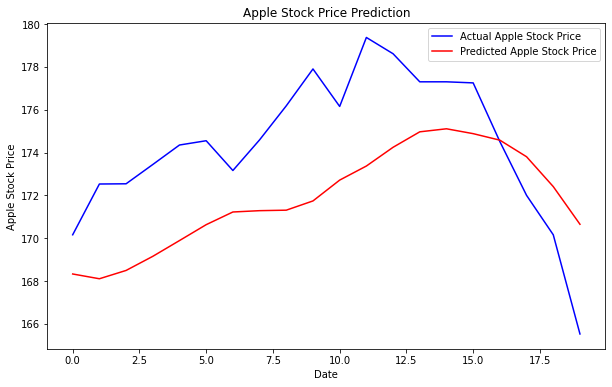

In [54]:
# Now we will be Visulalizing the Graph
plt.figure(figsize=(10,6))  
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()

** Conclusion : - 
A long short-term memory network (LSTM) is one of the most commonly used neural networks for time series analysis. The ability of LSTM to remember previous information makes it ideal for such tasks. In this article, we saw how we can use LSTM for the Apple stock price prediction.
 **